In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

### Random Sample Imputation for Missing Values

##### Aim: Random Sample Imputation consists of taking random observation from the dataset and we use this observation to replace the NAN values

In [2]:
df = pd.read_csv('./CSV Files/titanic_train.csv', usecols=['age', 'fare', 'survived'])

In [3]:
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [4]:
df.isnull().sum()

age         174
fare          1
survived      0
dtype: int64

In [5]:
df.fare.value_counts()

13.0000     42
8.0500      40
7.7500      39
7.8958      32
26.0000     29
            ..
247.5208     1
11.1333      1
39.4000      1
7.1417       1
25.7417      1
Name: fare, Length: 236, dtype: int64

In [6]:
df.fare.unique()

array([  7.7333,   8.6625,  24.15  ,  23.    ,  13.    ,  22.525 ,
         0.    ,   7.775 ,   9.825 , 211.5   ,  76.2917,  83.1583,
        20.25  ,   7.8542,  16.    ,  23.25  ,  55.    ,   8.4583,
        65.    ,   7.8958,   8.05  ,  26.    ,   7.75  ,  21.    ,
         7.2292,  52.    ,  25.925 ,   8.1583,  11.5   ,   7.925 ,
       262.375 ,   7.55  ,   7.25  ,  15.1   , 134.5   ,  30.5   ,
        83.475 ,  15.5792,  69.55  , 153.4625,   7.125 ,  79.2   ,
        10.5   , 120.    , 512.3292,  25.4667,  20.575 ,   9.4833,
        60.    ,  20.525 ,   9.2167,  14.1083, 106.425 ,  26.55  ,
        14.4542,   7.4958,  10.1708,   7.05  , 110.8833,  21.6792,
        32.5   ,  14.4583,  80.    ,   9.5   ,  36.75  , 108.9   ,
         7.7958,   7.225 ,  25.9292, 164.8667,  26.2875,  46.9   ,
        27.7208,   6.4375,  10.7083,  23.45  ,  15.7417,  29.7   ,
        14.    ,  27.75  ,   7.7417,   9.    ,  13.775 , 211.3375,
         8.1125,  12.875 ,  56.4958,  30.    , 151.55  ,  31.2

In [7]:
df.fare.nunique()

236

In [8]:
df.fare.value_counts().index[0]

13.0

In [9]:
df.fare.fillna(df.fare.value_counts().index[0], inplace=True)

In [10]:
df.isnull().sum()

age         174
fare          0
survived      0
dtype: int64

In [11]:
## Percentage of Null Values

df.isnull().mean()

age         0.204706
fare        0.000000
survived    0.000000
dtype: float64

In [12]:
median = df.age.median()

In [13]:
median

28.0

In [14]:
random_sam = df.age.dropna().sample(df.age.isnull().sum(), random_state=0)

In [15]:
random_sam.index

Int64Index([716,  39, 446, 240, 508, 386, 420,  15, 313, 222,
            ...
            607,  82, 436, 642, 788, 801, 669, 768,  16, 250],
           dtype='int64', length=174)

In [16]:
index = df[df.age.isnull()].index

In [17]:
index

Int64Index([  0,  17,  21,  28,  30,  31,  33,  38,  41,  46,
            ...
            763, 778, 780, 787, 794, 814, 820, 821, 828, 836],
           dtype='int64', length=174)

In [18]:
random_sam.index = index
random_sam.index

Int64Index([  0,  17,  21,  28,  30,  31,  33,  38,  41,  46,
            ...
            763, 778, 780, 787, 794, 814, 820, 821, 828, 836],
           dtype='int64', length=174)

In [19]:
random_sam

0      27.0
17     29.0
21     25.0
28      8.0
30     32.0
       ... 
814    47.0
820     9.0
821    21.0
828    40.0
836    48.0
Name: age, Length: 174, dtype: float64

In [20]:
random_sam.values

array([27.    , 29.    , 25.    ,  8.    , 32.    , 19.    ,  9.    ,
       48.    , 34.    , 31.    , 29.    , 50.    , 22.    , 28.    ,
       42.    , 59.    , 60.5   , 38.    , 15.    ,  0.8333, 18.    ,
       18.    , 64.    ,  0.4167,  6.    ,  9.    , 51.    , 21.    ,
       37.    , 51.    , 32.    , 43.    , 20.    , 24.    , 16.    ,
       55.    , 29.    , 18.    , 33.    , 50.    , 22.    , 28.    ,
       39.    , 28.    , 16.    , 27.    , 29.    , 50.    , 31.    ,
       14.    , 25.    , 41.    , 32.    , 63.    , 16.    , 54.    ,
       16.    , 22.    , 48.    , 21.    , 32.5   , 17.    , 31.    ,
       39.    , 47.    , 41.    ,  1.    , 32.    , 60.    ,  1.    ,
       28.    , 18.    , 45.    , 22.    , 22.    , 22.    , 62.    ,
       22.    ,  3.    , 27.    , 24.    , 21.    , 36.    , 18.    ,
       20.    , 32.    , 58.    , 30.    , 46.    , 25.    , 28.    ,
       29.    , 32.    , 50.    , 36.    , 25.    , 22.    , 36.    ,
       25.    , 57. 

In [21]:
df.age.isnull()

0       True
1      False
2      False
3      False
4      False
       ...  
845    False
846    False
847    False
848    False
849    False
Name: age, Length: 850, dtype: bool

In [22]:
random_sam.shape

(174,)

In [23]:
def impute_nan(df, variable, median):
    df[variable+'_median'] = df[variable].fillna(median)
    df[variable+'_random'] = df[variable]
    
    ## It will have the random sample to fill the NAN values
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    ## Pandas need to have same index in order to merge the dataser
    random_sample.index = df[df[variable].isnull()].index
    
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample

In [24]:
impute_nan(df, 'age', median)

In [25]:
df.head()

,age,fare,survived,age_median,age_random
0,NaN,7.7333,1,28.0,27.0
1,38.0,8.6625,0,38.0,38.0
2,30.0,24.1500,0,30.0,30.0
3,54.0,23.0000,1,54.0,54.0
4,40.0,13.0000,0,40.0,40.0


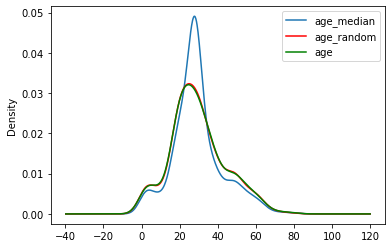

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
df.age_median.plot(kind='kde', ax=ax)
df.age_random.plot(kind='kde', ax=ax, color='red')
df.age.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Capturing NAN Values for Missing Values

In [27]:
df = pd.read_csv('./CSV Files/titanic_train.csv', usecols=['age', 'fare', 'survived'])

In [28]:
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [29]:
df.fare.fillna(df.fare.value_counts().index[0], inplace=True)

In [30]:
df['age_nan'] = np.where(df.age.isnull(), 1, 0)

In [31]:
df.head()

,age,fare,survived,age_nan
0,NaN,7.7333,1,1
1,38.0,8.6625,0,0
2,30.0,24.1500,0,0
3,54.0,23.0000,1,0
4,40.0,13.0000,0,0


In [32]:
median = df.age.median()

In [33]:
median

28.0

In [34]:
df.age.fillna(median, inplace=True)

In [35]:
df.head(20)

,age,fare,survived,age_nan
0,28.0,7.7333,1,1
1,38.0,8.6625,0,0
2,30.0,24.1500,0,0
3,54.0,23.0000,1,0
4,40.0,13.0000,0,0
5,28.0,22.5250,0,0
6,19.0,0.0000,0,0
7,30.0,13.0000,1,0
8,22.0,7.7750,1,0
9,21.0,9.8250,0,0


## Observation:
### Pros: 
1. Easy to Implement
2. Capturing the importance of missing values

### Cons:
1. Creating Additional Features (Curse of Dimensionality)

## End of Distribution Imputation

In [36]:
df = pd.read_csv('./CSV Files/titanic_train.csv', usecols=['age', 'fare', 'survived'])

In [37]:
df.fare.fillna(df.fare.value_counts().index[0], inplace=True)

In [38]:
df.head(20)

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0
5,28.0,22.5250,0
6,19.0,0.0000,0
7,30.0,13.0000,1
8,22.0,7.7750,1
9,21.0,9.8250,0


<AxesSubplot:>

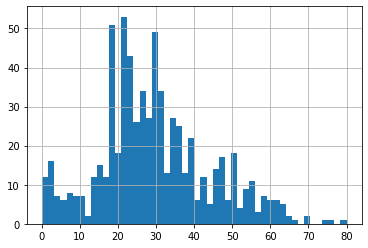

In [39]:
df.age.hist(bins=50)

In [40]:
extreme = df.age.mean() + 3 * df.age.std()

In [41]:
df[df['age'] > 73]

,age,fare,survived
177,80.0,30.000,1
733,74.0,7.775,0
834,76.0,78.850,1


In [42]:
import seaborn as sns

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

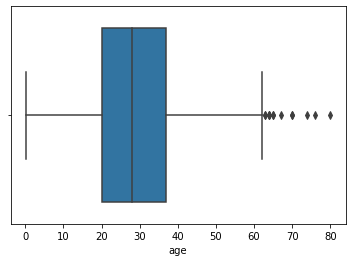

In [43]:
sns.boxplot('age', data=df)

In [44]:
def impute_nan(df, variable, extreme):
    df[variable+'_extreme_distribution'] = df[variable].fillna(extreme)
    df[variable].fillna(median, inplace=True)

In [45]:
impute_nan(df, 'age', extreme)

In [46]:
df.head(20)

,age,fare,survived,age_extreme_distribution
0,28.0,7.7333,1,73.206577
1,38.0,8.6625,0,38.000000
2,30.0,24.1500,0,30.000000
3,54.0,23.0000,1,54.000000
4,40.0,13.0000,0,40.000000
5,28.0,22.5250,0,28.000000
6,19.0,0.0000,0,19.000000
7,30.0,13.0000,1,30.000000
8,22.0,7.7750,1,22.000000
9,21.0,9.8250,0,21.000000


<AxesSubplot:>

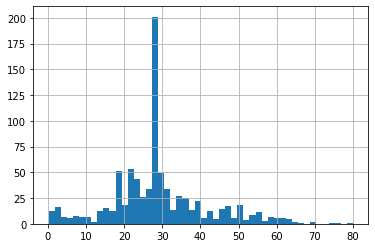

In [47]:
df.age.hist(bins=50)

<AxesSubplot:>

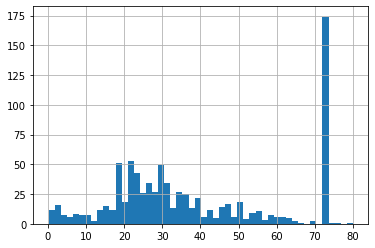

In [48]:
df.age_extreme_distribution.hist(bins=50)

## Observation:
### Cons:
1. Change in the distortion of variance

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_extreme_distribution'>

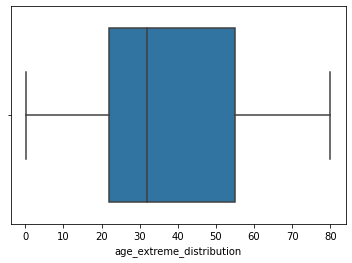

In [49]:
sns.boxplot('age_extreme_distribution', data=df)

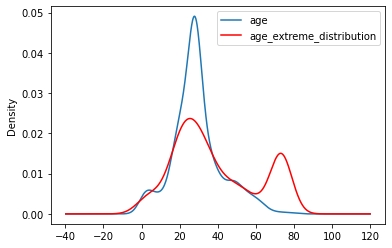

In [50]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
df.age.plot(kind='kde', ax=ax)
df.age_extreme_distribution.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## Cons: 
1. Distorts the original distribution of the variable